# Clustering

## Definition

Finding subgroups (clusters) in a dataset that group instances that are very similar to each other

## Distances in unsupervised learning
[Reference](https://machinelearningmastery.com/distance-measures-for-machine-learning/)

### Hamming distance
    
- Calculates the distance between 2 binary vectors / binary strings / bitstrings
- Useful when you one-hot encode categorical columns of data (therefore an interesting measure for heavily categorical input features)
- Examples of usage: character recognition, fuzzy matching of names

- Formula: `sum for i to N abs(v1[i] - v2[i])`


### Euclidean distane

- Calculates the distance between two real-valued vectors
- Useful when calculating the distance between two floating point or integer values
- Columns should be scaled (normalized or standardized) in roder to achieve that
- Square root of the sum of the squarred differences between two vecotrs

- Formula for 2 elements: `sqrt( (x1 - x2)^2 + (y1-y1)^ 2 )`

- Standard formula: `sqrt( sum for i to N (v1[i] - v2[i])^2 )`
- Shortcut for big N: `sum for i to N (v1[i] - v2[i])^2`

- Related to the **L2 vector norm**, equivalent to `MSE`, `RMSE`

### Manhattan distance

- AkA Taxicab distance - distance between two real-valued vectors
- Useful to vectors that describe objects on a uniform grid (chessboard, city blocks)
- Shortest path that a taxicab would take between city blocks

- Useful for datasets with Ordinal Encoded data: an integer feature space

- Formula for 2 elements: `sum ( |x[1] - x[2]| + |y[1] - y[2]| )`

- Formula: ManhattanDistance = `sum for i to N sum |v1[i] – v2[i]|`

- Related to the **L1 vector norm** and equivalent to `MAE`

### Minkowski distance

- Generalization p=1 implies Manhattan, p=2 implies Euclidean

- Minkowski distance: `(sum for i to N (abs(v1[i] –v2[i]))^p)^(1/p)`

## K-means clustering



### How it works
1. Randomly assign a number form 1 to K for each of the observations
    - Initial assignments for the observations
2. Iterate until cluster assignments stop changing
    - For each of the K clusters, compute cluster centroid
    - Assign each observation to the closest centroid (Euclidean distance)
### How to find the right # of clusters (K)
1. Elbow Curve Method
2. Coefficients: Silhouette, Calinski-Harasbasz, Davies Bouldin



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./inputs/bank_marketing_dataset.csv")

In [3]:
df.shape

(41188, 21)

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


### Random data exploring - ignore

Text(0.5, 1.0, 'Age distribution of customers')

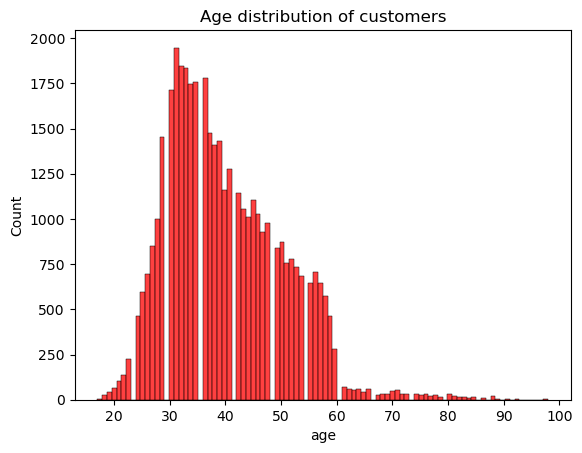

In [15]:
ax = sns.histplot(df, x='age', color='red')
ax.set_title("Age distribution of customers")

Text(0.5, 1.0, 'Age distribution of customers vs their loan status')

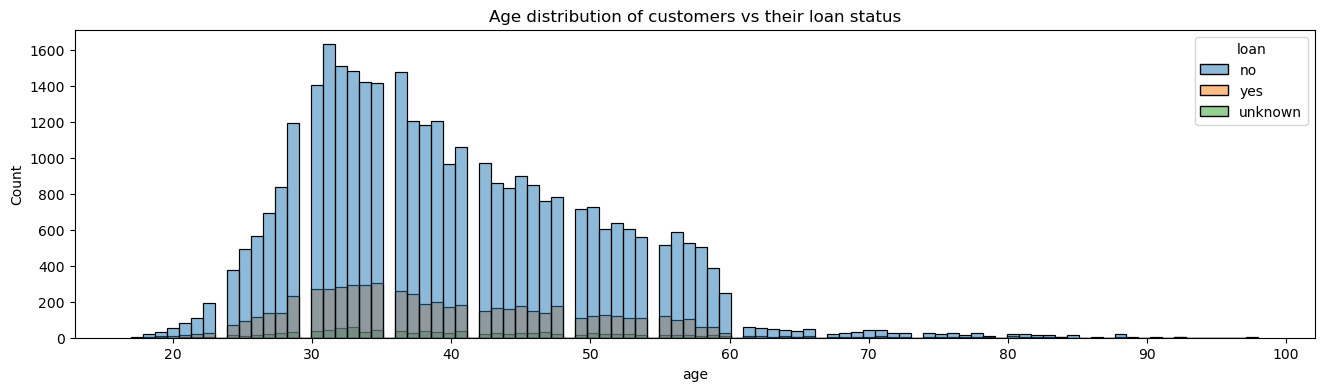

In [17]:
_, ax = plt.subplots(figsize=(16,4))
sns.histplot(df, x='age', hue='loan', ax=ax)
ax.set_title("Age distribution of customers vs their loan status")

Text(0.5, 1.0, 'Marital Status os customers')

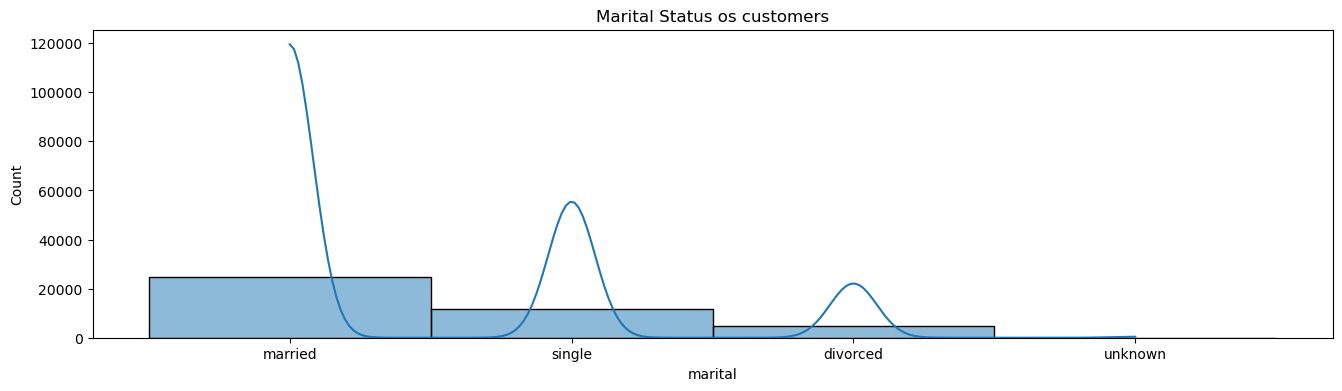

In [19]:
_, ax = plt.subplots(figsize=(16,4))
sns.histplot(df, x='marital', kde=True, ax=ax)
ax.set_title("Marital Status os customers")

Text(0.5, 1.0, 'Distribution of days since last campaign')

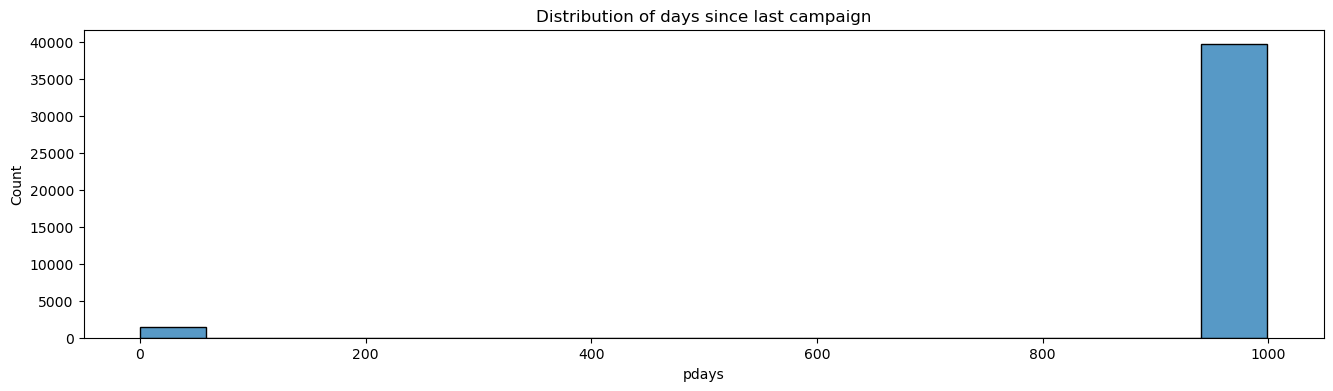

In [20]:
_, ax = plt.subplots(figsize=(16,4))
sns.histplot(df, x='pdays', ax=ax)
ax.set_title("Distribution of days since last campaign")

In [22]:
df['pdays'].value_counts().head()

999    39673
3        439
6        412
4        118
9         64
Name: pdays, dtype: int64

Text(0.5, 1.0, 'Distribution of days since last campaign')

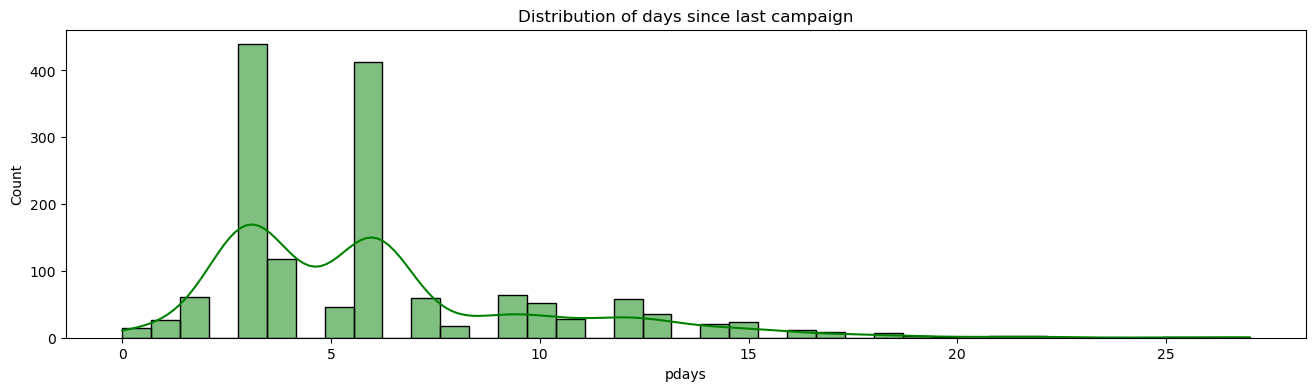

In [23]:
_, ax = plt.subplots(figsize=(16,4))
sns.histplot(df[df.pdays != 999], x='pdays', kde=True, ax=ax, color='green')
ax.set_title("Distribution of days since last campaign")

(0.0, 1000.0)

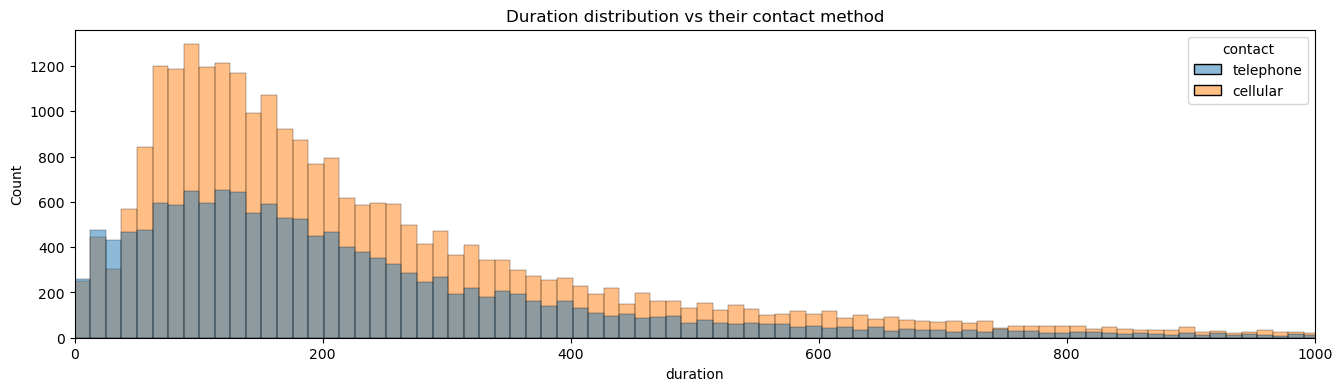

In [25]:
_, ax = plt.subplots(figsize=(16,4))
sns.histplot(df, x='duration', hue='contact', ax=ax)
ax.set_title("Duration distribution vs their contact method")
ax.set_xlim(0,1000)

### Get your hands dirty

In [28]:
# let's first try one hot encoding... useful for the vast majority of categorical features

df_dummies = pd.get_dummies(df)

In [29]:
df_dummies.shape

(41188, 65)

In [4]:
from sklearn.preprocessing import StandardScaler

In [34]:
df_scaled = StandardScaler().fit_transform(df_dummies)

In [35]:
df_scaled

array([[ 1.53303429,  0.01047142, -0.56592197, ..., -0.1857    ,
         0.35630932, -0.35630932],
       [ 1.62899323, -0.42150051, -0.56592197, ..., -0.1857    ,
         0.35630932, -0.35630932],
       [-0.29018564, -0.12451981, -0.56592197, ..., -0.1857    ,
         0.35630932, -0.35630932],
       ...,
       [ 1.53303429, -0.26722482, -0.20490853, ..., -0.1857    ,
         0.35630932, -0.35630932],
       [ 0.38152696,  0.70856893, -0.56592197, ..., -0.1857    ,
        -2.80655022,  2.80655022],
       [ 3.26029527, -0.07438021,  0.15610492, ..., -0.1857    ,
         0.35630932, -0.35630932]])

In [3]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

In [38]:
# model
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(df_scaled)

KMeans(n_clusters=2, random_state=0)

In [39]:
cluster_labels = kmeans.predict(df_scaled)

In [41]:
pd.Series(cluster_labels).value_counts()

0    26869
1    14319
dtype: int64

In [42]:
df_dummies['Cluster'] = cluster_labels

## Correlation with each feature we assigned

Text(0.5, 1.0, 'Correlation between features and Clusters')

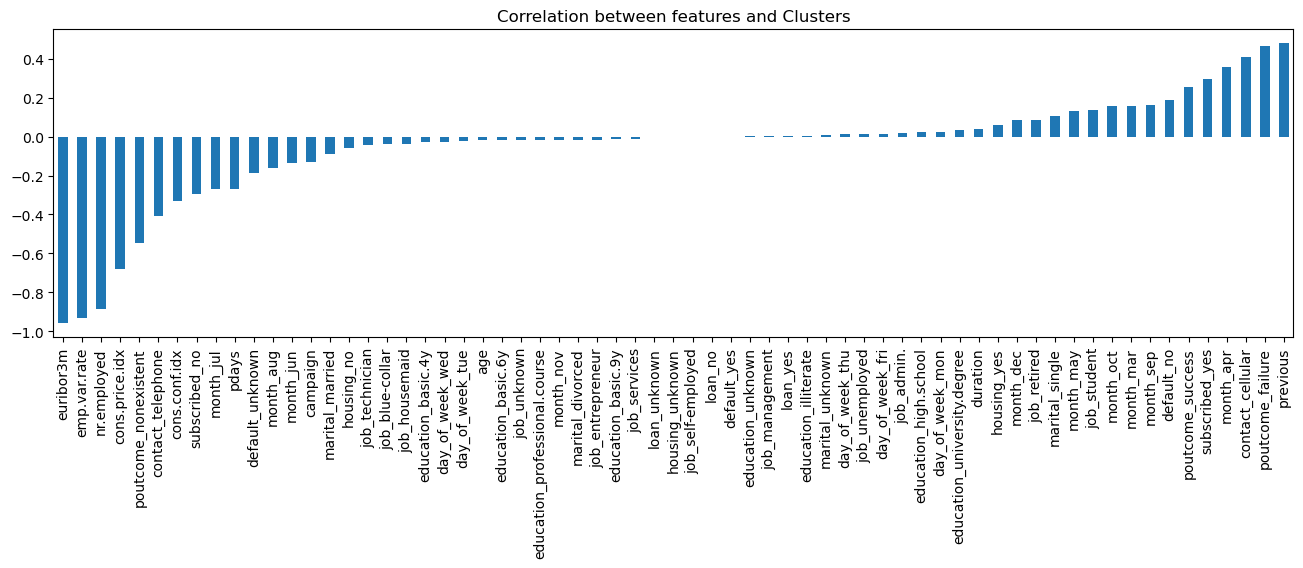

In [46]:
_, ax = plt.subplots(figsize=(16,4))

df_dummies.corr()["Cluster"].iloc[:-1].sort_values().plot(kind='bar', ax=ax)
ax.set_title("Correlation between features and Clusters")

### Find optimal K

1. Elbow method

In [2]:
from sklearn.metrics import silhouette_score

In [59]:
ssd = []
sil_euclidean = []
sil_manhattan = []

for k in range (2,10):
    model = KMeans(n_clusters=k, random_state=0)
    model.fit(df_dummies)
    
    labels = model.predict(df_dummies)
    sil_euc = silhouette_score(df_dummies, labels, metric='euclidean',
                               sample_size=4000,random_state=0)
    sil_man = silhouette_score(df_dummies, labels, metric='manhattan',
                               sample_size=4000,random_state=0)
    
    ssd.append(model.inertia_)
    sil_euclidean.append(sil_euc)
    sil_manhattan.append(sil_man)

In [53]:
ssd

[2735461312.1918206,
 1321035050.29542,
 851056307.0117946,
 642597051.5253341,
 531577270.36776245,
 440295538.43687224,
 376952898.31534815,
 326257742.72391546]

In [60]:
sil_euclidean

[0.6379060772821817,
 0.68982111679596,
 0.5608653096170444,
 0.47533030600119086,
 0.44481610648561,
 0.44908097424331545,
 0.4409943646018801,
 0.43588908451182645]

In [61]:
sil_manhattan

[0.5976298727529932,
 0.6393205695482804,
 0.504811844153565,
 0.4266447335586645,
 0.3997458942319297,
 0.42645252331367894,
 0.40564453822821506,
 0.3993199973957571]

Text(0, 0.5, 'Inertia')

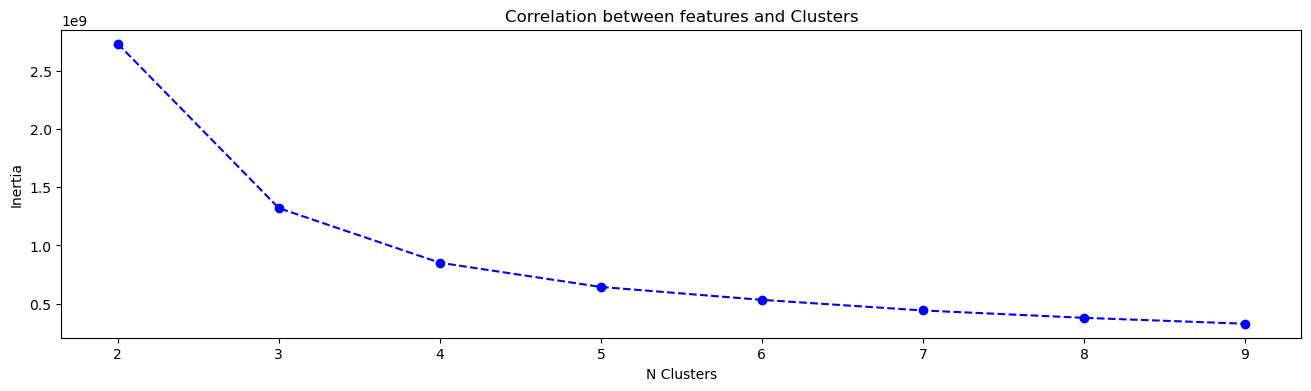

In [62]:
_, ax = plt.subplots(figsize=(16,4))

ax.plot(range(2,10), ssd, 'o--', color='blue')
ax.set_title("Correlation between features and Clusters")
ax.set_xlabel("N Clusters")
ax.set_ylabel("Inertia")

In [63]:
pd.Series(ssd).diff()

0             NaN
1   -1.414426e+09
2   -4.699787e+08
3   -2.084593e+08
4   -1.110198e+08
5   -9.128173e+07
6   -6.334264e+07
7   -5.069516e+07
dtype: float64

Max diff value in ssd happens for K=4
- Still probably suboptimal as most features are cateogircal and K-means uses euclidean distance

2. Silhouette

- A best in class clustering algorithm will yield a silhouette score ~1.0
- Euclidean distance performs better in any # of clusters
- N = 3 returns the best clustering of customers

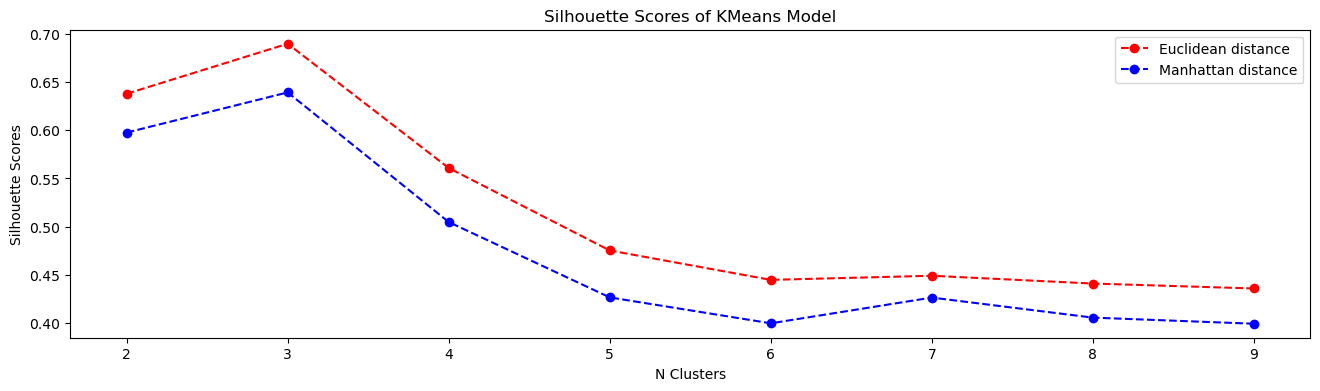

In [69]:
_, ax = plt.subplots(figsize=(16,4))

ax.plot(range(2,10), sil_euclidean, 'o--', color='red', label='Euclidean distance')
ax.plot(range(2,10), sil_manhattan, 'o--', color='blue', label='Manhattan distance')
ax.set_title("Silhouette Scores of KMeans Model")
ax.set_xlabel("N Clusters")
ax.set_ylabel("Silhouette Scores")
ax.legend()

## Hierarchical Clustering

In [5]:
from sklearn.cluster import AgglomerativeClustering

In [6]:
df = pd.read_csv("./inputs/auto_mpg.csv")

In [7]:
df.shape

(398, 9)

In [8]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [9]:
df.origin.value_counts()

1    249
3     79
2     70
Name: origin, dtype: int64

In [10]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [11]:
df_with_dummies = pd.get_dummies(df.drop("car name", axis=1))

In [12]:
df_with_dummies.head()

,mpg,cylinders,displacement,weight,acceleration,model year,origin,horsepower_100,horsepower_102,horsepower_103,...,horsepower_90,horsepower_91,horsepower_92,horsepower_93,horsepower_94,horsepower_95,horsepower_96,horsepower_97,horsepower_98,horsepower_?
0,18.0,8,307.0,3504,12.0,70,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15.0,8,350.0,3693,11.5,70,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,18.0,8,318.0,3436,11.0,70,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,16.0,8,304.0,3433,12.0,70,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17.0,8,302.0,3449,10.5,70,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler = MinMaxScaler()

In [15]:
df_scaled = scaler.fit_transform(df_with_dummies)

In [17]:
df_scaled  = pd.DataFrame(df_scaled,columns=df_with_dummies.columns)

In [18]:
df_scaled.head()

,mpg,cylinders,displacement,weight,acceleration,model year,origin,horsepower_100,horsepower_102,horsepower_103,...,horsepower_90,horsepower_91,horsepower_92,horsepower_93,horsepower_94,horsepower_95,horsepower_96,horsepower_97,horsepower_98,horsepower_?
0,0.239362,1.0,0.617571,0.536150,0.238095,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.159574,1.0,0.728682,0.589736,0.208333,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.239362,1.0,0.645995,0.516870,0.178571,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.186170,1.0,0.609819,0.516019,0.238095,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.212766,1.0,0.604651,0.520556,0.148810,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


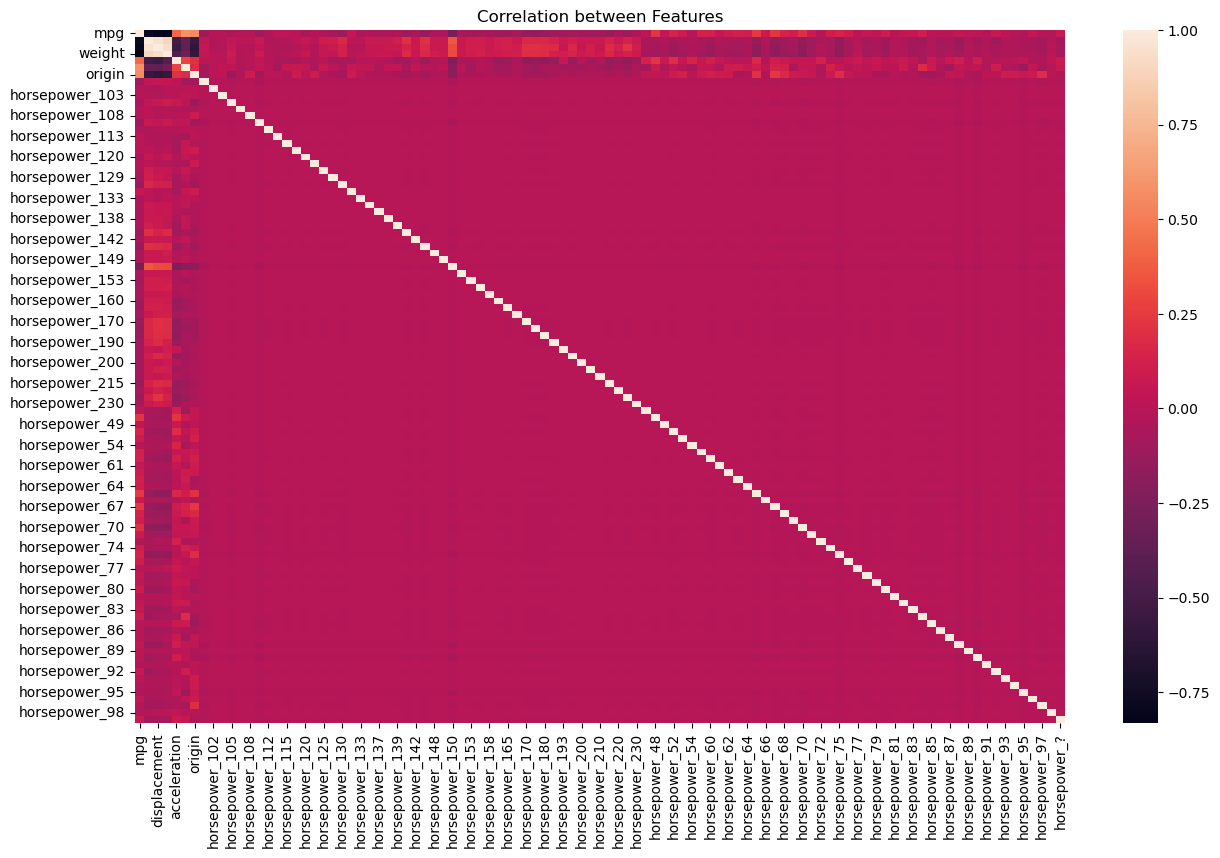

In [19]:
plt.figure(figsize=(15,9))
sns.heatmap(df_scaled.corr())
plt.title("Correlation between Features")
plt.show()

/home/gran/miniconda3/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 2000x900 with 0 Axes>

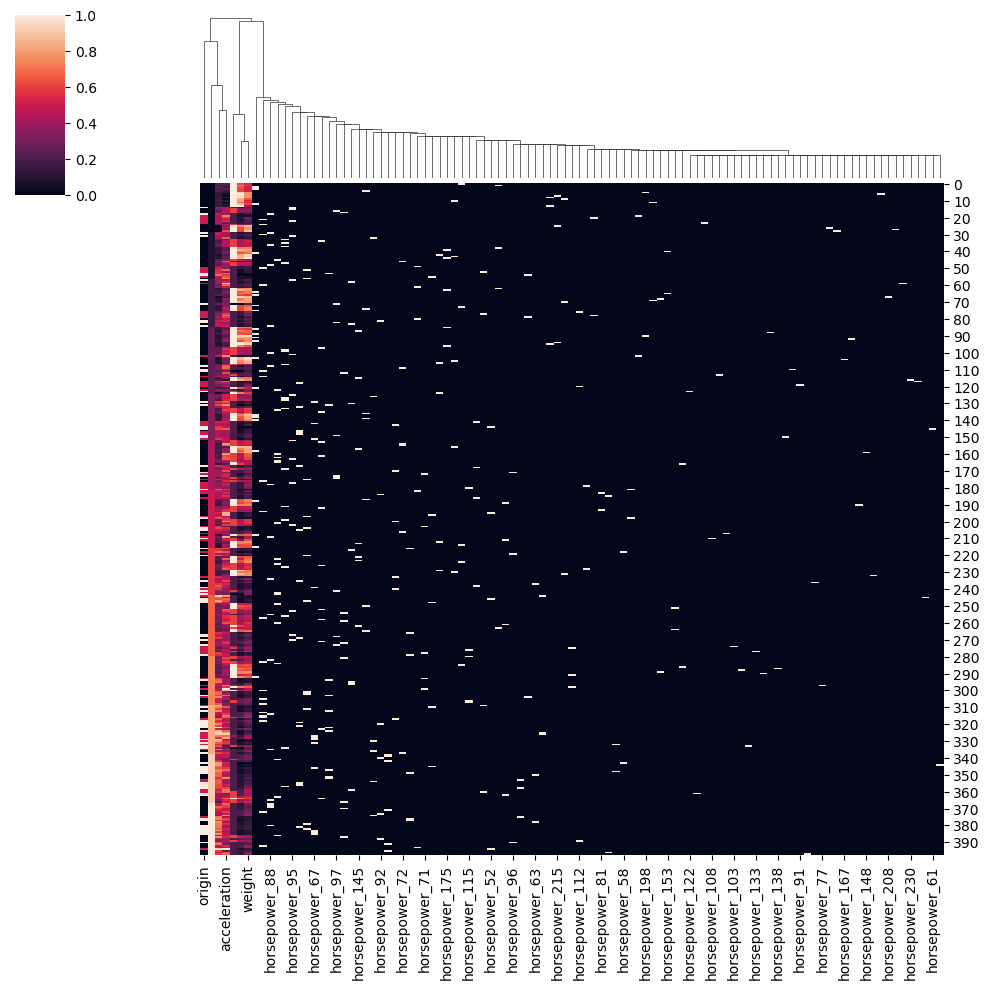

In [20]:
plt.figure(figsize=(20,9))
sns.clustermap(df_scaled,row_cluster=False)
plt.show()

In [21]:
model = AgglomerativeClustering(n_clusters=5, affinity="euclidean")
# distance threshold may also be important

In [22]:
model.fit(df_scaled)

AgglomerativeClustering(n_clusters=5)

In [25]:
cluster_labels = model.labels_

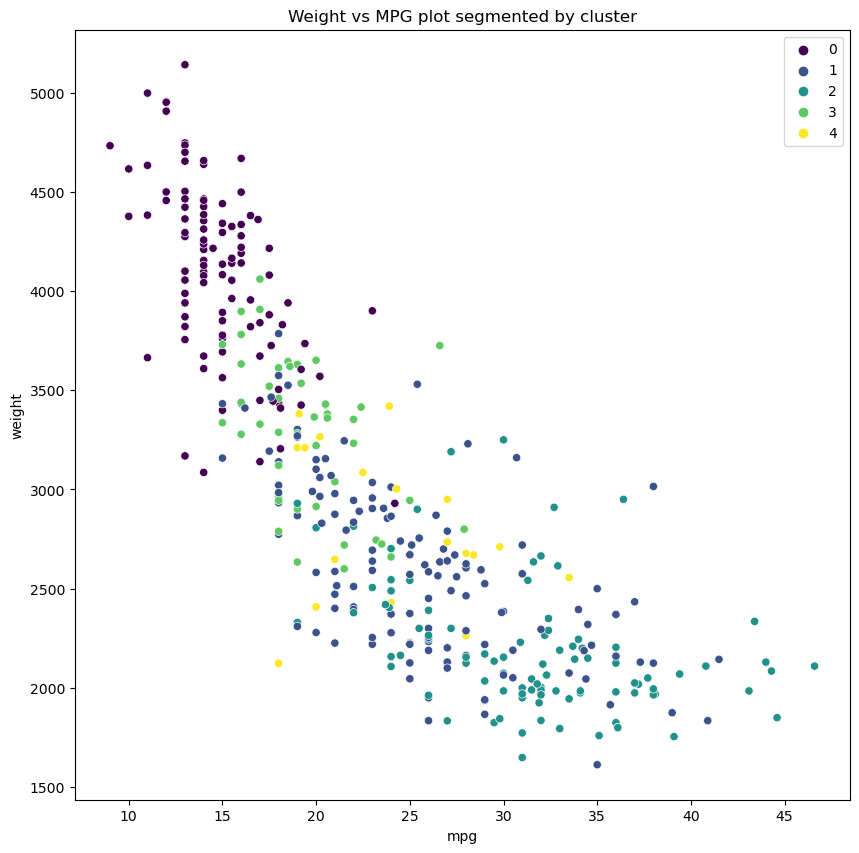

In [29]:
_, ax = plt.subplots(figsize=(10,10))

sns.scatterplot(data=df, x = "mpg", y = "weight", hue=cluster_labels, palette="viridis", ax= ax)

ax.set_title("Weight vs MPG plot segmented by cluster")
ax.legend()

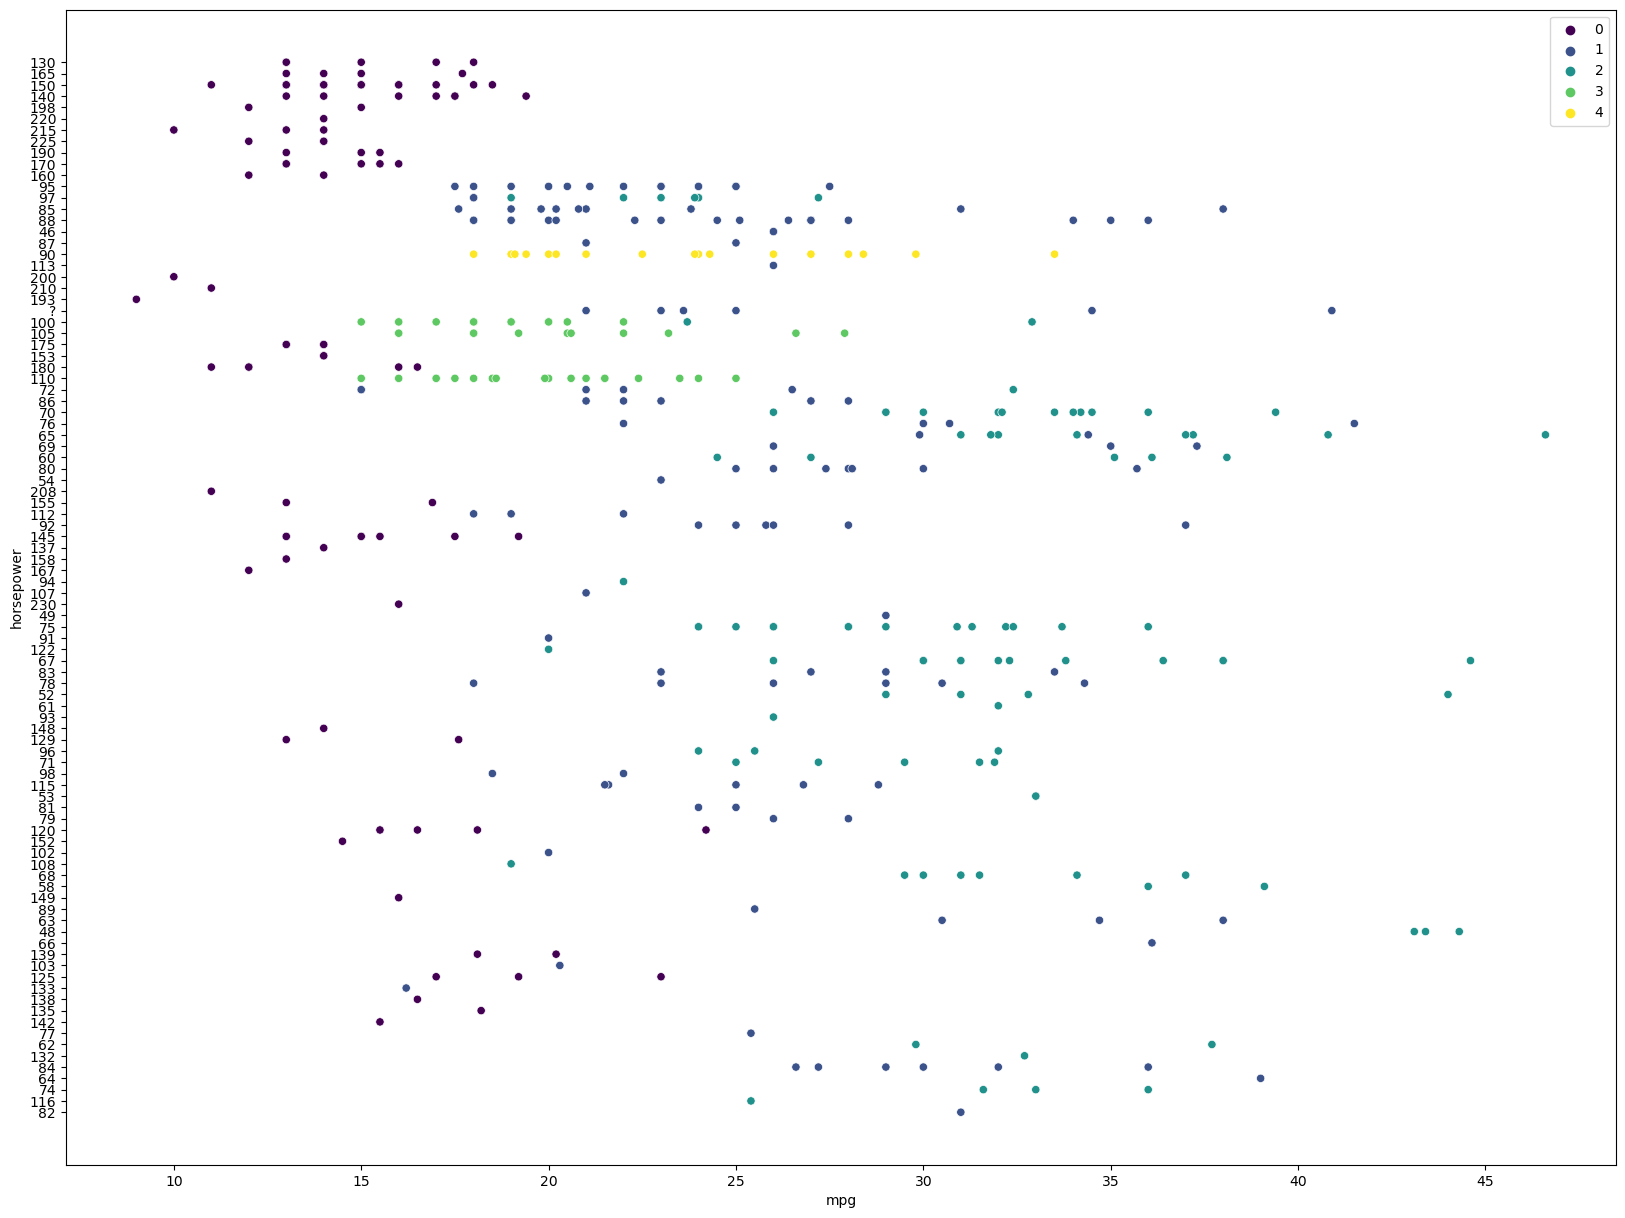

In [32]:
plt.figure(figsize=(20,15))
sns.scatterplot(data=df,x="mpg",y="horsepower",hue=cluster_labels,palette="viridis")
plt.grid(False)

In [34]:
from scipy.cluster import hierarchy

In [35]:
linkage_matrix = hierarchy.linkage(model.children_)

In [36]:
linkage_matrix

array([[ 24.        ,  26.        ,   1.41421356,   2.        ],
       [148.        , 154.        ,   1.41421356,   2.        ],
       [103.        , 116.        ,   1.41421356,   2.        ],
       ...,
       [725.        , 789.        ,  70.22819946, 393.        ],
       [319.        , 790.        ,  70.60453243, 394.        ],
       [748.        , 791.        ,  88.05112151, 397.        ]])

In [37]:
linkage_df = pd.DataFrame(
    linkage_matrix, 
    columns=['First Point','Second Point','Distance Between Points',
             'How many points are there in the cluster?']
)

linkage_df.head()

,First Point,Second Point,Distance Between Points,How many points are there in the cluster?
0,24.0,26.0,1.414214,2.0
1,148.0,154.0,1.414214,2.0
2,103.0,116.0,1.414214,2.0
3,46.0,71.0,1.414214,2.0
4,53.0,70.0,1.414214,2.0


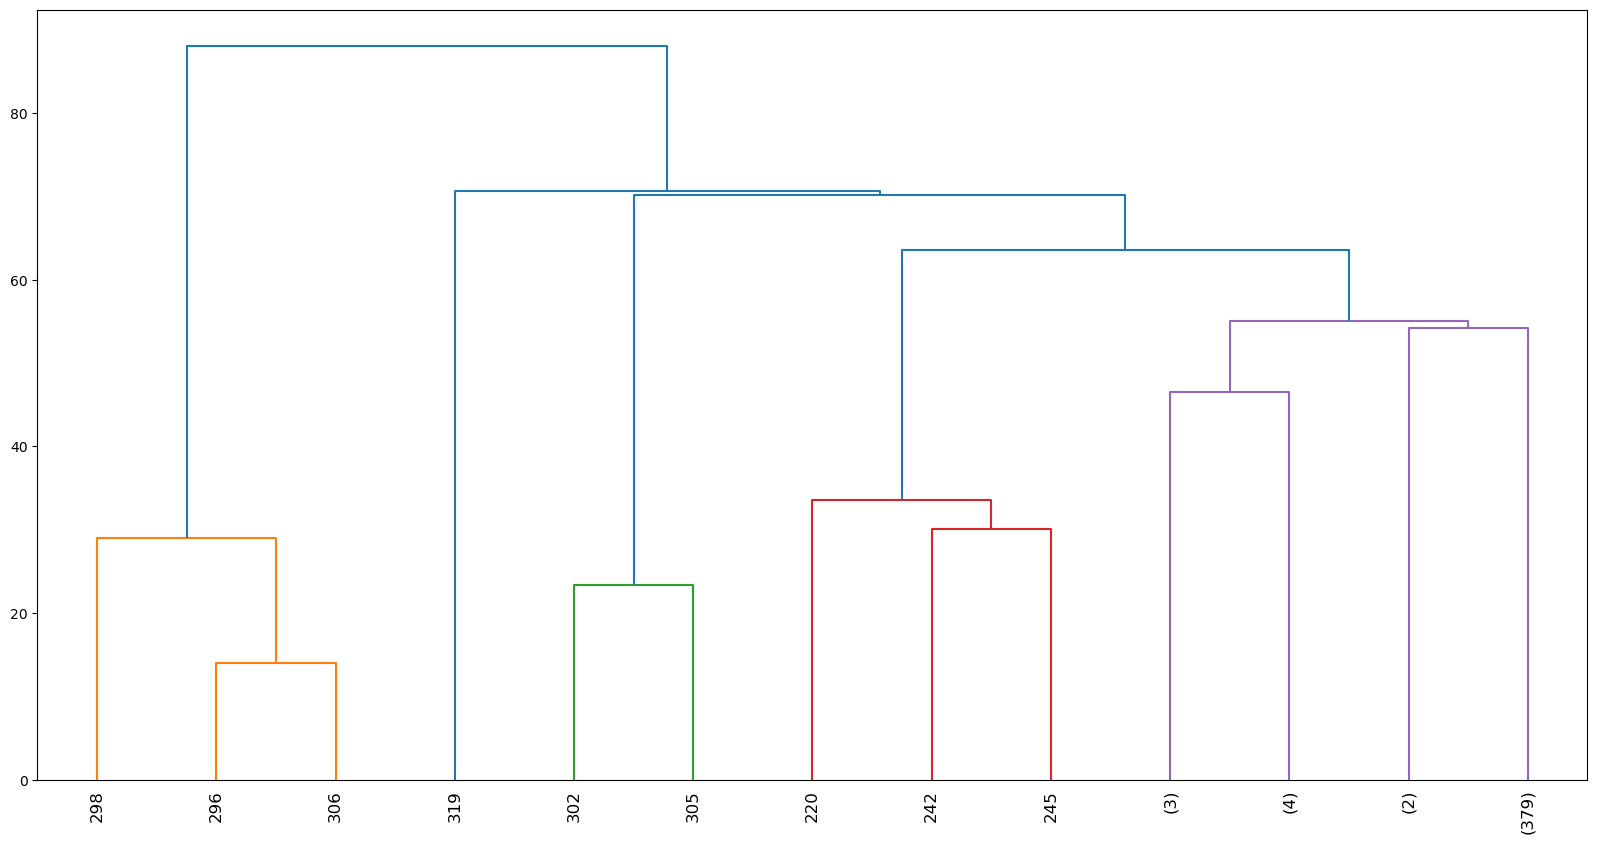

In [38]:
plt.figure(figsize=(20,10))
dendogram = hierarchy.dendrogram(linkage_matrix, truncate_mode='level', p=5)
plt.xticks(rotation=90)
plt.grid(False)
plt.show()

In [40]:
# Mall customer segmentation data
df = pd.read_csv("./inputs/mall_customers.csv")

In [41]:
df.shape

(200, 5)

In [42]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [43]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [44]:
# Select only annual income and spending score columns
X = df.iloc[:, [3,4]]

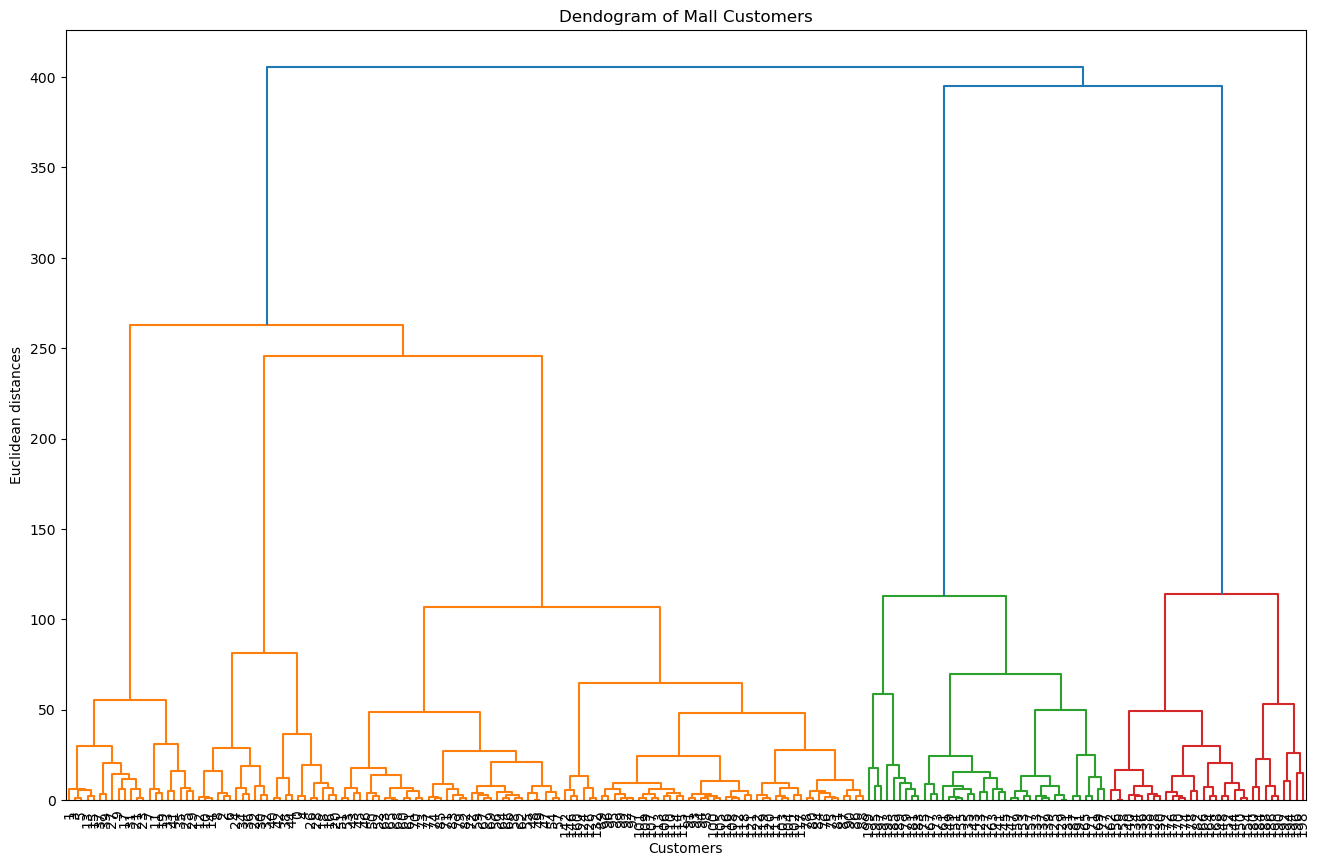

In [47]:
plt.figure(figsize=(16,10))
dendrogram = hierarchy.dendrogram(
    hierarchy.linkage(X, method = 'ward'), 
    leaf_font_size=10
)
plt.title('Dendogram of Mall Customers')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.xticks(rotation=90)
plt.show()

In [63]:
model = AgglomerativeClustering(n_clusters = 5, affinity='euclidean')

In [64]:
cluster_labels = model.fit_predict(X)

Text(0.5, 1.0, 'Agglomerative Clusters by annual income and Spending Score')

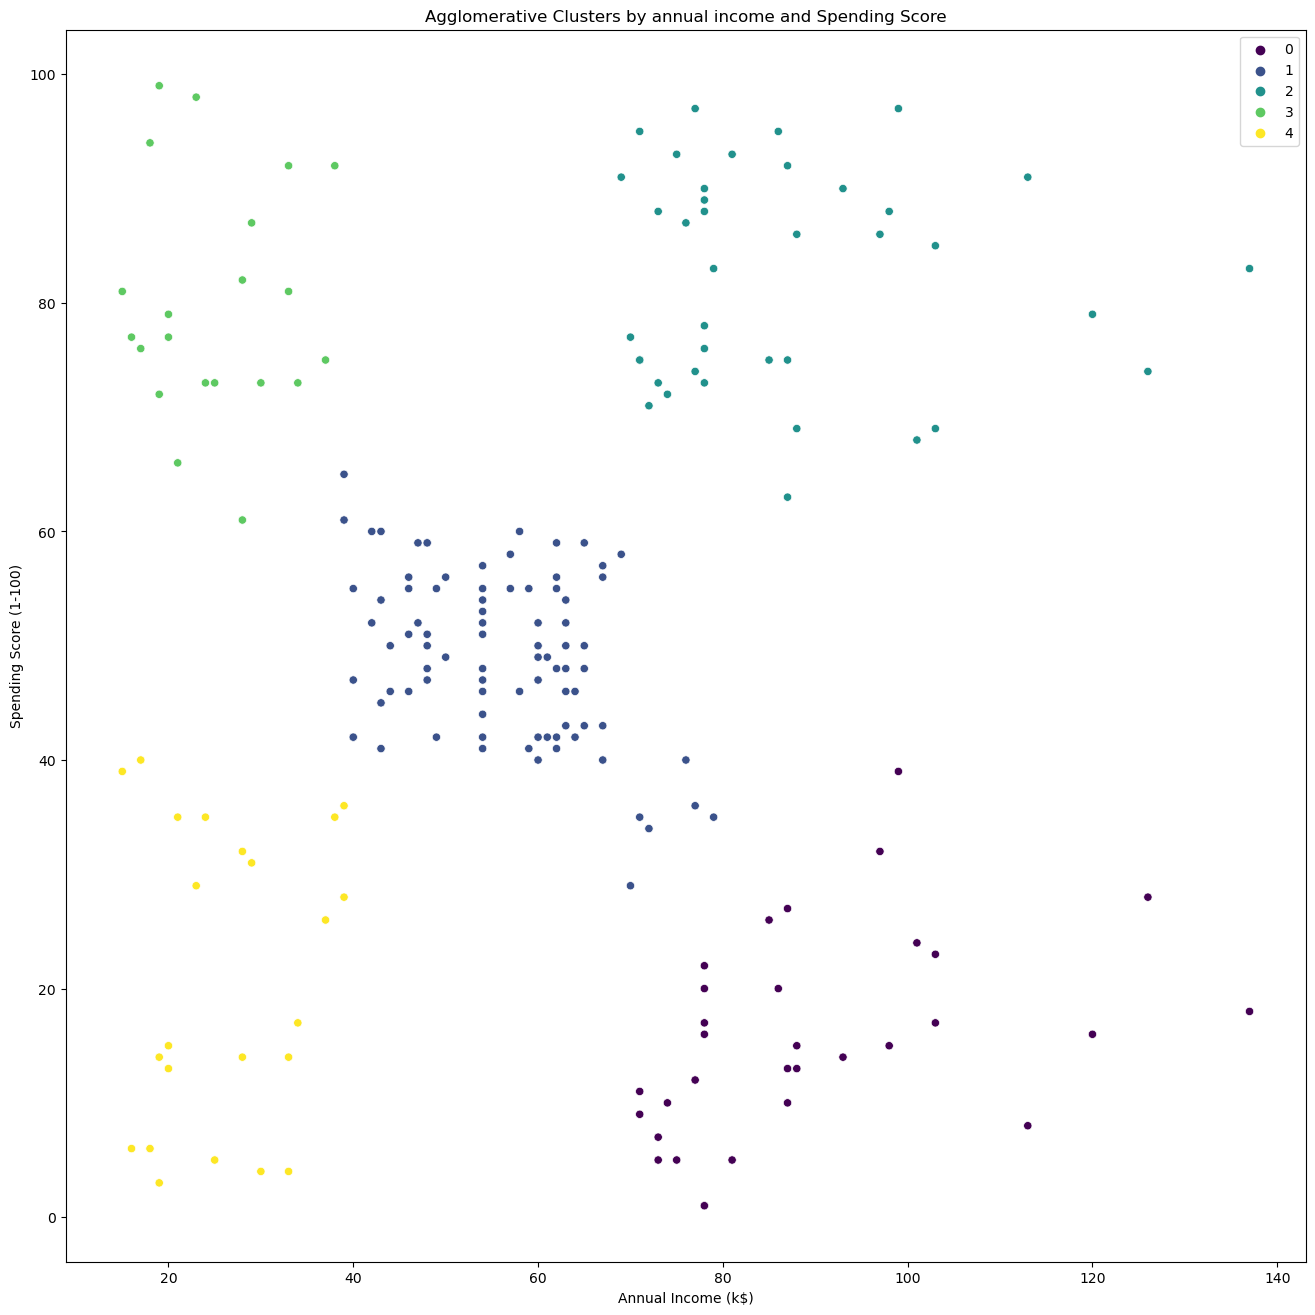

In [65]:
_, ax = plt.subplots(figsize=(16,16))

sns.scatterplot(data=df, x='Annual Income (k$)', 
                y = 'Spending Score (1-100)', 
                hue=cluster_labels, 
                palette = 'viridis',
                ax = ax)

ax.set_title("Agglomerative Clusters by annual income and Spending Score")

# DBSCAN
- eps(distance to lcoate the poitns in the neighborhood)
- minPts (threshold for a region to be considered dense - # of instances in the eps area)

In [66]:
df = pd.read_csv('./inputs/wholesale_customers_data.csv')

In [67]:
df.shape

(440, 8)

In [68]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [70]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


<Axes: xlabel='Milk', ylabel='Grocery'>

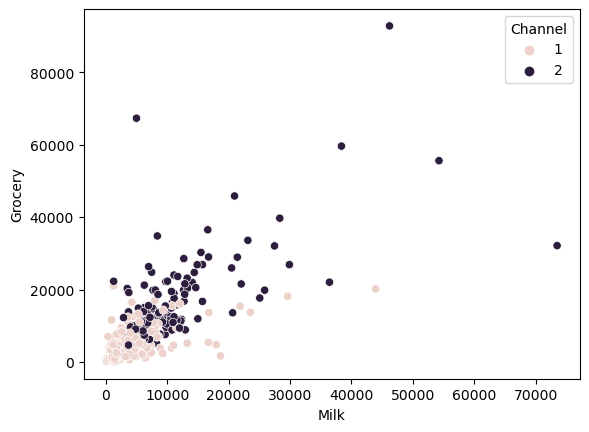

In [71]:
sns.scatterplot(data=df, x='Milk', y='Grocery', hue='Channel')

<Axes: xlabel='Milk', ylabel='Count'>

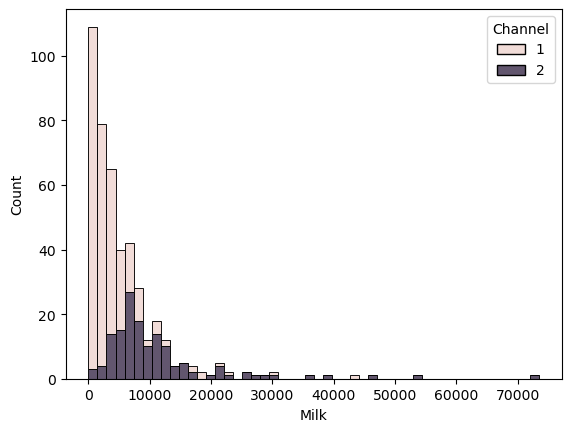

In [72]:
sns.histplot(df, x='Milk', hue='Channel', multiple='stack')

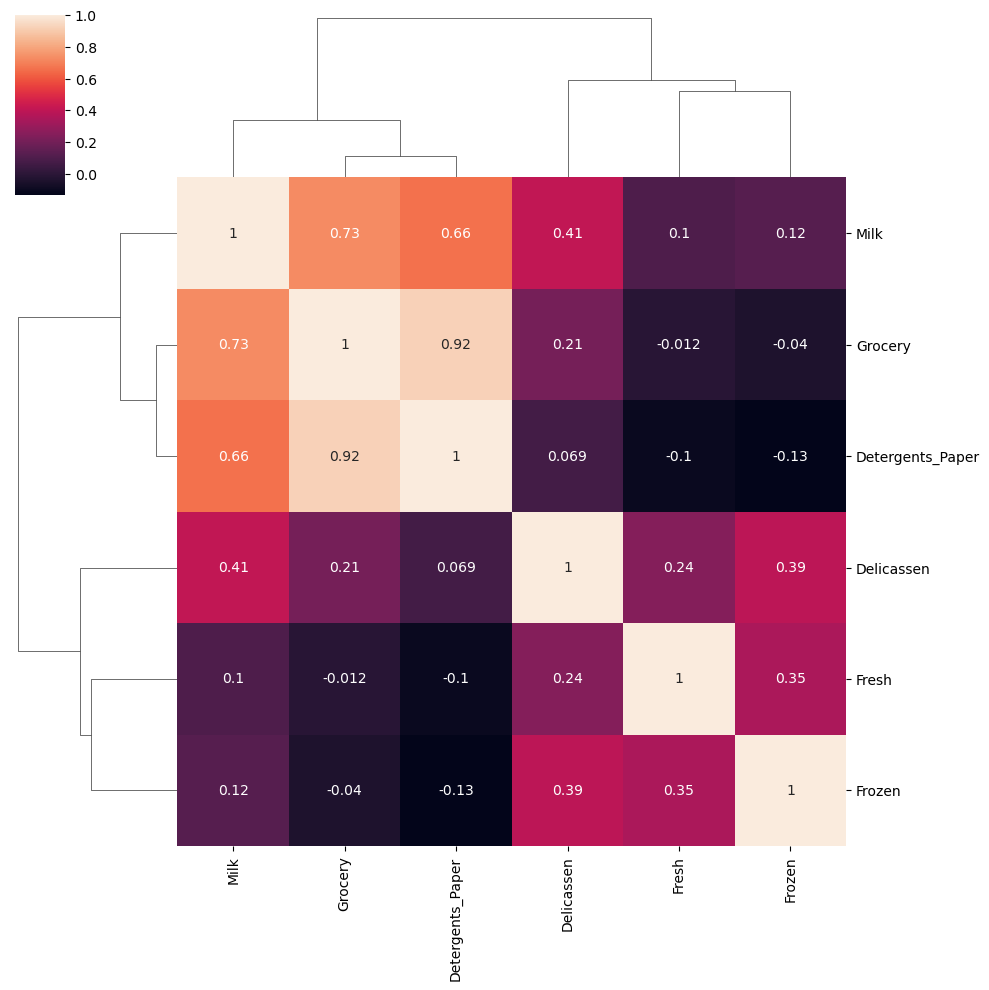

In [73]:
sns.clustermap(df.drop(['Region','Channel'], axis=1).corr(), annot=True)

In [74]:
scaler = StandardScaler()

In [75]:
scaled_X = scaler.fit_transform(df)

In [78]:
outlier_percent = []

for eps in np.linspace(0.001, 3, 50):
    
    # Create Model
    dbscan = DBSCAN(eps=eps, min_samples=2*scaled_X.shape[1])
    dbscan.fit(scaled_X)
    
    # Log percentage of poitns that are outliers
    out_perc = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
                    
    outlier_percent.append(out_perc)

Text(0, 0.5, 'Epsilon Value')

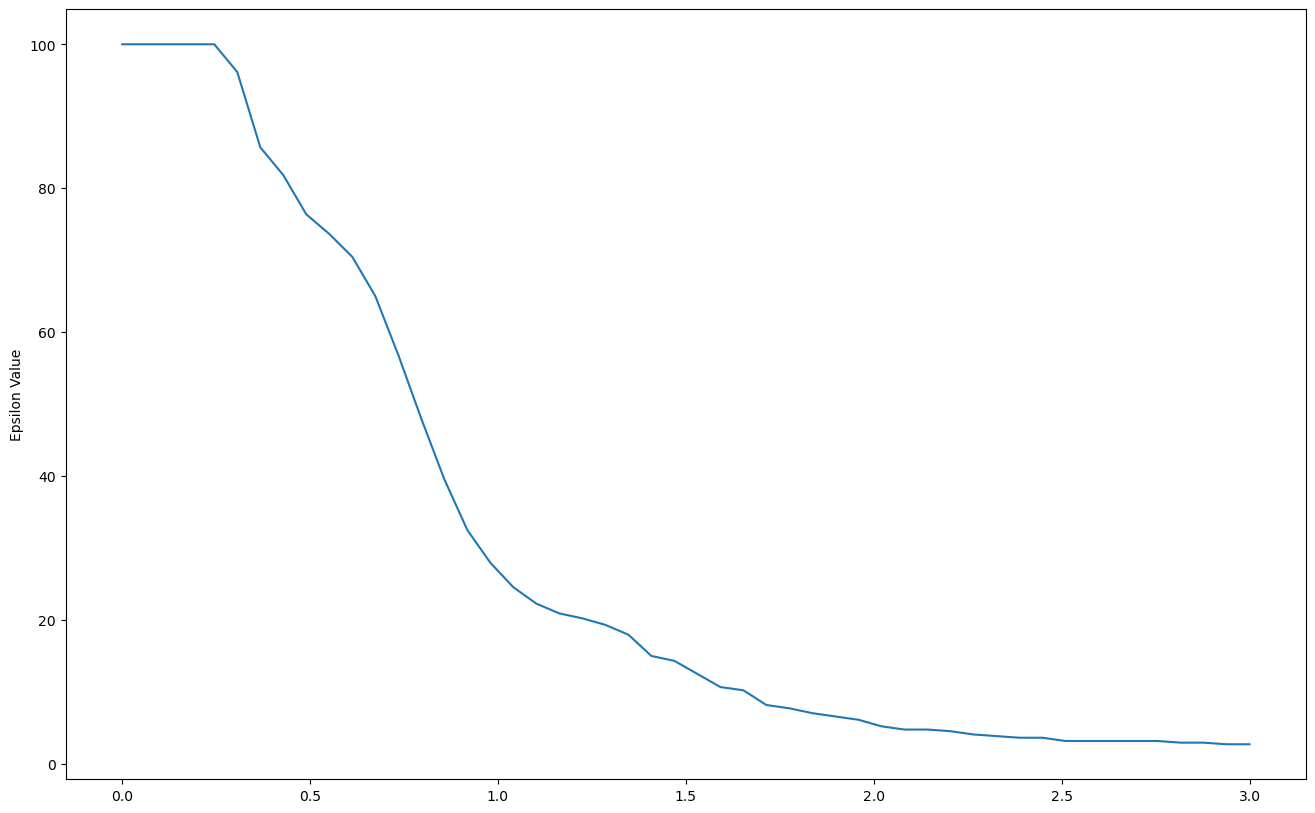

In [79]:
_, ax = plt.subplots(figsize=(16,10))
sns.lineplot(x=np.linspace(0.001,3,50), y=outlier_percent, ax=ax)

ax.set_ylabel('Percentage of points classified as outliers')
ax.set_ylabel('Epsilon Value')

In [80]:
dbscan = DBSCAN(eps=2)
dbscan.fit(scaled_X)

DBSCAN(eps=2)

In [81]:
df['Labels'] = dbscan.labels_

In [82]:
df['Labels'].value_counts()

 1    291
 0    132
-1     17
Name: Labels, dtype: int64